(ch:probability-discrete)=
# 이산확률분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

이산확률분포의 주요 개념을 소개한다.

- 이산확률변수
- 이산확률분포
- 확률질량함수
- 누적분포함수

## 이산확률변수

{numref}`%s장 <ch:probability>`에서 살펴본 확률변수는 해당 변수에 할당될 수 있는 값과 그 값이
발생할 확률에 의해 정의되었으며, 확률분포는 이를 정리한 결과다.

예를 들어 한 개의 정상적인 주사위를 던졌을 때 나올 수 있는 값을 가리키는 확률변수 $Y$의
확률분포는 다음과 같다.

| Y | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

반면에 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 소득 범주를 가리키는 확률변수 $X$의
확률분포는 다음과 같다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

위 두 예제에서 확률변수가 가리키는 값은 $x_1$, $x_2$, $x_3$ ... 등의 형식으로 하나, 둘, 셋 하며 셀 수 있다. 
이런 값을 가리키는 확률변수를 **이산확률변수**<font size='2'>discrete random variable</font>,
이산확률변수가 따르는 확률분포를 **이산확률분포**<font size='2'>discrete probability distribution</font>라 한다.

**예제: 소득 범주 이산확률분포**

캘리포니아 주택가격 데이터셋을 이용하여 앞서 언급된 소득 범주의 이산확률분포를 가리키는 데이터프레임을 직접 생성해본다.

캘리포니아 주택가격 데이터셋을 불러온 후에 가구중위소득과 주택중위가격만 활용한다.

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.

In [8]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


중위소득 범주 특성을 추가한다.

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
district,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


소득 범주별로 그룹화하고 구간별 도수와 상대도수를 확인한다.

In [10]:
x_stratification = housing.iloc[:, [0, 2]].groupby('income_cat', observed=True, group_keys=True)
x_stratified_count = x_stratification.count()
x_stratified_ratio = x_stratified_count/(housing.shape)[0]
x_stratified_ratio

,median_income
income_cat,
1,0.041372
2,0.333011
3,0.361017
4,0.177992
5,0.086607


위 데이터프레임을 이용하여 소득 범주에 대한 확률분포를 구한다.

In [11]:
# 데이터프레임으로 변환
prob_income = x_stratified_ratio.iloc[:, 0:1]
# 컬럼과 인덱스 이름 지정
prob_income.columns = ['확률']
prob_income.index.name = 'X'

# 가로형의 데이터프레임으로 변환
prob_income = prob_income.T
prob_income

X,1,2,3,4,5
확률,0.041372,0.333011,0.361017,0.177992,0.086607


### 확률질량함수(PMF)

이산확률변수 $X$가 가리키는 값이 $x$이고 $x$가 발생할 확률이 $p$일 때 다음과 같이 표기한다.

$$
P(X=x) = p
$$

확률변수 $X$가 $x$를 취할 수 있는 확률을 계산하는 
**확률질량함수**<font size='2'>probability mass function</font>(PMF)함수 $f$를 다음과 같이 정의한다.

$$
f(x) = P(X = x)
$$

**예제: 소득 범주의 PMF**

소득 범주의 PMF는 다음과 같이 정의할 수 있다.

In [12]:
def f_income(x):
    return prob_income[x].iloc[0]

예를 들어 임의의 구역의 소득 범주가 2일 확률은 약 33.3%다.

In [13]:
f_income(2)

0.333011

**확률의 성질**

이산확률분포가 주어졌을 때 모든 경우에 대한 확률은 0과 1사이의 부동소수점이고, 
모든 확률의 합은 1이다.
즉 다음이 성립해야 한다.

- 첫째, 확률변수가 취할 수 있는 임의의 값 $x_k$에 대한 확률은 0과 1 사이의 값이다.

    $$0 \le f(x_k) \le 1$$

- 둘째, 확률변수가 취할 수 있는 모든 값에 대한 확률의 합은 1이다.

    $$\sum_k f(x_k) = 1$$


소득 범주의 확률변수 또한 위 성질을 만족한다.

- 모든 확률은 0과 1사이의 값

In [14]:
(0 <= prob_income) & (prob_income <= 1)

X,1,2,3,4,5
확률,True,True,True,True,True


다음 방식도 가능하다.

In [15]:
((0 <= prob_income) & (prob_income <= 1)).all(axis=1)

확률    True
dtype: bool

- 모든 확률의 합은 1

In [16]:
prob_income.sum(axis=1)

확률    1.0
dtype: float64

### 누적분포함수(CDF)

확률변수 $X$가 $x$보다 같거나 작은 값을 가질 확률을 계산하는 함수를
**누적분포함수**<font size='2'>cumulative distribution function</font>(CDF)라고 부르며
아래처럼 정의된다.

$$
F(x) = P(X \le x) = \sum_{x_k \le x} f(x_k)
$$

**소득 범주의 CDF**

소득 범주의 CDF 또한 `prob_income`을 이용하여 정의된다.

In [17]:
def income_cdf(x):
    return np.sum([prob_income[x_k] for x_k in prob_income.columns if x_k <= x])

예를 들어 소득 범주가 1부터 3까지에 속할 확률은 약 73.5%다.

In [18]:
income_cdf(3)

0.735400

모든 소득 범주의 합이 1임을 아래 방식으로도 확인한다.

In [19]:
income_cdf(5)

1.000000

## 다변량 분포

**다변량 분포**<font size='2'>multivariate distribution</font>는
여러 개의 확률변수들이 결합된 확률분포다.
여기서는 두 개의 이산확률변수가 결합된 다변량 분포를 소개한다.

:::{admonition} 단변량 분포
:class: note

앞서 살펴 본 소득 범주를 가리키는 확률변수처럼 
하나의 확률변수에 대한 확률분포는 **단변량 분포**<font size='2'>univariate distribution</font>라 한다.
:::

### 이산결합확률분포

$X$, $Y$ 두 개의 이산확률변수가 주어졌을 때 $(X, Y)$는 각각의 확률변수가 취할 수 있는 값들의 조합을 가리키는 결합확률변수다.
결합확률변수 $(X, Y)$가 가리키는 값들이 발생할 가능성의 확률분포를
**이산결합확률분포**<font size='2'>discrete joint probability distribution</font>라 부른다.
이산결합확률분포의 확률질량함수는 **결합확률질량함수**<font size='2'>joint probability mass function</font>로 정의되며,
확률변수 $X$는 $x$를, 확률변수 $Y$는 $y$를 취할 확률을

$$
f_{XY}(x, y) = P(X=x, Y=y) = p
$$

로 표현한다.
경우에 따라 아래처럼 표현되기도 한다.

$$
f_{XY}(x, y) = P(X=x \;\cap\; Y=y) = p
$$

또는 

$$
f_{XY}(x, y) = P(X=x \;\;\text{and}\;\; Y=y) = p
$$

**예제: 소득 범주와 주택가격 범주**

캘리포니아 주택가격에 데이터셋에 포함된 중위주택가격을 지정된 가격 구간으로 나눠 새로운 이산확률변수 $Y$를 선언한다.
먼저 주택가격 범주를 소득 범주와 유사한 방식으로 추가한다.

중위주택가격의 범위는 14,999부터 500,000까지다.

In [20]:
housing.median_house_value.describe()

count     19675.000000
mean     192477.921017
std       97711.509613
min       14999.000000
25%      116600.000000
50%      173800.000000
75%      248200.000000
max      500000.000000
Name: median_house_value, dtype: float64

중위주택가격의 사분위수 정보를 이용하여 중위주택가격을 6개 범주로 나눈다.

In [21]:
housing["value_cat"] = pd.cut(housing["median_house_value"],
                              bins=[0, 50_000, 100_000, 150_000, 250_000, 400_000, np.inf],
                              labels=range(1, 7))

housing

,median_income,median_house_value,income_cat,value_cat
district,,,,
0,8.3252,452600.0,5,6
1,8.3014,358500.0,5,5
2,7.2574,352100.0,5,5
3,5.6431,341300.0,4,5
4,3.8462,342200.0,3,5
...,...,...,...,...
19670,1.5603,78100.0,2,2
19671,2.5568,77100.0,2,2
19672,1.7000,92300.0,2,2


중위주택가격 범주별로 그룹화하고 그룹별 도수와 상대도수를 확인한다.

In [22]:
y_stratification = housing.iloc[:, [1, 3]].groupby('value_cat', observed=True, group_keys=True)
y_stratified_count = y_stratification.count()
y_stratified_ratio = y_stratified_count/(housing.shape)[0]
y_stratified_ratio

,median_house_value
value_cat,
1,0.010673
2,0.175248
3,0.201372
4,0.367878
5,0.205235
6,0.039593


중위주택가격 범주에 대한 확률분포는 다음과 같다.

In [23]:
prob_value = y_stratified_ratio.iloc[:, 0:1]
prob_value.columns = ['확률']
prob_value.index.name = 'Y'

prob_value = prob_value.T
prob_value

Y,1,2,3,4,5,6
확률,0.010673,0.175248,0.201372,0.367878,0.205235,0.039593


참고로 소득 범주에 대한 확률분포는 다음과 같다.

In [24]:
prob_income

X,1,2,3,4,5
확률,0.041372,0.333011,0.361017,0.177992,0.086607


**$X$, $Y$의 확률질량함수**

여러 개의 확률변수를 사용하기에 각각의 확률질량함수도 통일된 방식으로 이름을 짓는 게
편리하다.

먼저 $X$의 확률질량함수는 앞서 정의한 `f_income()` 함수다.

In [25]:
def p_X(x):
    return f_income(x)

확률변수 $Y$의 확률질량함수는 다음과 같다.

In [26]:
def p_Y(y):
    return prob_value[y].iloc[0]

**결합확률질량함수(Joint PMF)**

캘리포니아 주택가격 데이터셋에 포함된 총 19,675개의 구역에서 한 구역을
임의로 선택했을 때 해당 구역의 소득 범주는4, 주택가격 범주는 3일 확률을 계산해보자.

먼저 두 확률변수 $X$와 $Y$는 상호 독립적인 관계가 아닐 가능성이 높음에 주의한다.
이유는 일반적으로 소득이 높은 지역일수록 주택가격이 높은 편이기 때문이다.
실제로 두 특성 사이의 상관계수가 0.64 정도로 매우 높은 편이며,
이는 $P(X=4, Y=3)$와 $P(X=4)\cdot P(Y=3)$가 다를 가능성이 매우 높음을 의미한다.

In [27]:
housing.iloc[:, :2].corr()

,median_income,median_house_value
median_income,1.000000,0.642611
median_house_value,0.642611,1.000000


결합확률질량함수 $P(X=x, Y=y)$는 두 개의 확률변수 $X$와 $Y$가 가질 수 있는 값들의 조합에 대한 확률을 계산한다.
따라서 두 확률변수가 가리키는 값들의 조합이 발생하는 경우가 얼마나 많은지를 확인하면 된다.
`pd.crosstab()` 함수를 이용하면 간단하게 모든 조합의 경우를 포함하는 도수분포표를 작성할 수 있다.

먼저 소득 범주와 주택가격 범주만 따로 다룬다.

In [28]:
two_cats = housing.iloc[:, -2:]
two_cats

,income_cat,value_cat
district,,
0,5,6
1,5,5
2,5,5
3,4,5
4,3,5
...,...,...
19670,2,2
19671,2,2
19672,2,2


`pd.crosstab()` 함수를 적용하면 두 범주 특성에 대한 **교차표**<font size='2'>cross table</font>를 생성한다.
교차표엔 두 범주 특성의 가능한 모든 조합에 대한 도수가 포함된다.

- `margins=True` 키워드 인자: 행과 열별 도수의 합 포함

In [29]:
cats_crossed = pd.crosstab(two_cats.iloc[:, 0], two_cats.iloc[:, 1], margins=True)
cats_crossed

value_cat,1,2,3,4,5,6,All
income_cat,,,,,,,
1,72,436,159,108,33,6,814
2,131,2335,1880,1799,358,49,6552
3,6,650,1652,3343,1273,179,7103
4,1,24,251,1753,1289,184,3502
5,0,3,20,235,1085,361,1704
All,210,3448,3962,7238,4038,779,19675


교차표에 인덱싱을 적용하면 임의의 $x$와 $y$에 대해 $P(X=x, Y=y)$를 계산할 수 있다.
예를 들어 $P(X=4, Y=3)$는 다음과 같다.

- `cats_crossed.loc[4, 3]`: 소득 범주는 4, 주택가격 범주는 3인 경우의 도수
- `cats_crossed.loc['All', 'All']`: 모집단 크기

In [30]:
cats_crossed.loc[4, 3]

251

In [31]:
cats_crossed.loc['All', 'All']

19675

$P(X=4, Y=3)$는 따라서 다음과 같다.

In [32]:
cats_crossed.loc[4, 3] / cats_crossed.loc['All', 'All']

0.012757

소득 범주와 주택가격 범주의 결합확률분포를 따르는 결합확률질량함수는 따라서 다음과 같이 정의 된다.

In [33]:
def p_XY(x, y):
    count = cats_crossed.loc[x, y]
    pop = cats_crossed.loc['All', 'All']
    return count / pop

캘리포니아 주택가격 데이터셋에서 임의의 구역을 선택했을 때 소득 범주는 4, 주택가격 범주는 3인 경우의 확률은 다음과 같다.

In [34]:
p_XY(4, 3)

0.012757

캘리포니아 주택가격 데이터셋에서 임의의 구역을 선택했을 때 소득 범주는 5, 주택가격 범주는 6인 경우의 확률은 다음과 같다.

In [35]:
p_XY(5, 6)

0.018348

참고로 두 확률변수가 서로 영향을 주지 않는다면 위 결과가 아래 결과와 같아야 하는데 그렇지 않다.
즉, 두 확률변수는 서로 독립이 아니다.

In [36]:
p_X(5) * p_Y(6)

0.003429

**확률의 성질**

이산결합확률분포에 대해서도 모든 경우에 대한 확률은 0과 1사이의 부동소수점이고, 
모든 확률의 합은 1이다.

첫째, 두 확률변수 $X$, $Y$가 취할 수 있는 임의의 값 $x$와 $y$에 대한 확률은 0과 1 사이의 값이다.

답: `P_XY()` 함수의 정의에 의해 아래 데이터프레임의 각 항목이 0과 1사이의 값을 확인한다.

In [37]:
p_XY_df = cats_crossed / cats_crossed.loc['All', 'All']
p_XY_df

value_cat,1,2,3,4,5,6,All
income_cat,,,,,,,
1,0.003659,0.022160,0.008081,0.005489,0.001677,0.000305,0.041372
2,0.006658,0.118679,0.095553,0.091436,0.018196,0.002490,0.333011
3,0.000305,0.033037,0.083964,0.169911,0.064701,0.009098,0.361017
4,0.000051,0.001220,0.012757,0.089098,0.065515,0.009352,0.177992
5,0.000000,0.000152,0.001017,0.011944,0.055146,0.018348,0.086607
All,0.010673,0.175248,0.201372,0.367878,0.205235,0.039593,1.000000


In [38]:
(0 <= p_XY_df).all().all()

True

In [39]:
(1 >= p_XY_df).all().all()

True

둘째, 두 확률변수가 취할 수 있는 모든 조합에 대한 확률의 합은 1이다.

답: `p_XY_df.loc['All', 'All']`이 1임을 확인하면 된다.

In [40]:
p_XY_df.iloc[-1, -1]

1.000000

**이산결합확률분포의 히트맵**

영역별 값의 크기를 색과 농도로 구분하는 히트맵을 이용하면
중위소득 범주와 중위주택가격 범주 사이의 연관성을 한 눈에 알아볼 수 있다.

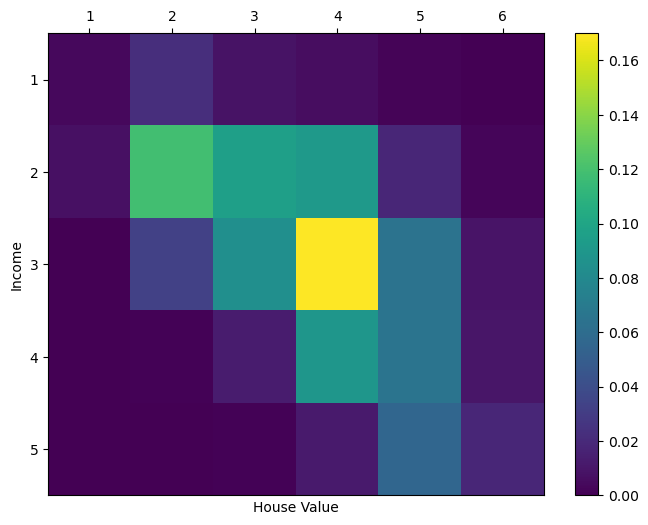

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

row, col = p_XY_df.shape

# 마지막 행과 열 제외
row -= 1
col -= 1

# 히트맵
c = ax.pcolor(p_XY_df.iloc[:row, :col])

# 축 눈금 지정
ax.set_xticks(np.arange(col) + 0.5, minor=False)
ax.set_yticks(np.arange(row) + 0.5, minor=False)

ax.set_xticklabels(range(1, col+1))
ax.set_yticklabels(range(1, row+1))

ax.invert_yaxis() # 소득 범주 위에서부터
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False) # x-축 눈금 위쪽으로

ax.set_xlabel('House Value')
ax.set_ylabel('Income')

fig.colorbar(c, ax=ax) # 색 기둥

plt.show()

대각선에 위치한 영역의 일반적으로 밝다.
특히 중위소득의 범주가 3, 중위주택가격의 범주가 4인 영역의 확률이 가장 높다.
일반적으로 소득 수준에 맞는 주택에 산다는 점과
중산층이 적절한 가격의 주택에 산다는 상식에 부합하는 결과를 보여준다.

반면에 각 확률변수의 확률분포를 그래프로 그리면 다음과 같다.

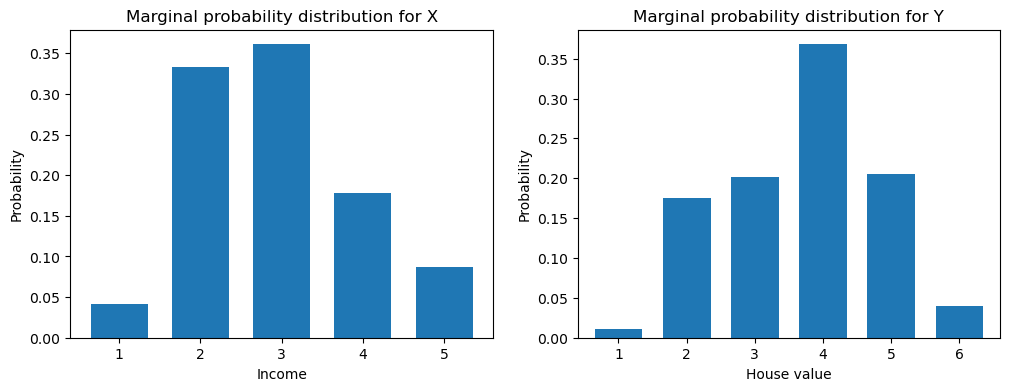

In [42]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

prob_income.T.plot(ax=ax1, kind='bar', rot=0, legend=False, width=.7)
ax1.set_title('Marginal probability distribution for X')
ax1.set_xlabel('Income')
ax1.set_ylabel('Probability')

prob_value.T.plot(ax=ax2, kind='bar', rot=0, legend=False, width=.7)
ax2.set_title('Marginal probability distribution for Y')
ax2.set_xlabel('House value')
ax2.set_ylabel('Probability')

plt.show()

### 조건부 확률

$P(A\mid B)$는 사건 $B$가 일어났다는 전제 하에 사건 $A$가 발생할
**조건부 확률**<font size='2'>conditional probability</font>을 나타내며,
아래 그림에서 파랑색 영역 $B$에서 보라색 영역이 차지하는 비율을 가리킨다.
반면에 조건부 확률과는 달리 $P(A)$, $P(B)$, $P(A, B)$ 등은 전체 검정색 영역 $U$에서 
각각의 영역이 차지하는 비율을 가리킨다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/conditional02.png?raw=true" style="width:300px"></div></p>

$P(A, B)$, 즉 $P(A \;\cap\; BB)$ 는 전체 검정색 영역 $U$에서 보라색 영역이 차지하는 비율이며, 따라서 $P(A \mid B)$와
일반적으로 다르다.
하지만 다음 식이 성립한다.

$$
P(A\mid B) = \frac{P(A, B)}{P(B)}\qquad (\ast)
$$

이유는 위 그림에서 바로 알 수 있듯이 다음이 성립하기 때문이다.

$$
P(A\mid B) = \frac{A \;\cap\; BB}{B} = \frac{\frac{A \;\cap\; BB}{U}}{\frac{B}{U}} = \frac{P(A \;\cap\; BB)}{P(B)}
$$

:::{admonition} 예제
:class: example

15명으로 구성된 동아리가 진행하는 행사에 참여하는 회원수가 다음과 같다.

|  | 여성(0) | 남성(1) | 합계 |
| :---: | :---: | :---:| :---: |
| 불참(0) | 2 | 2 | 4 |
| 참여(1) | 6 | 5 | 11 |
| 합계 | 8 | 7 | 15 |

15명 중에 한 명을 임의로 선택할 때
확률변수 $X$는 행사 참여 여부를,
확률변수 $Y$는 여성회원 여부를 가리킨다고 하자.

그러면 임의로 선택된 사람이 여성일 때 그 여성이 행사에 참여할 확률
$P(X=1\mid Y=0)$은 총 8명 여성회원 중에서 행사에 참여하는
6명의 비율인 3/4이다.
반면에 임의로 선택된 사람이 행사에 참여하는 여성일 확률 $P(X=1, Y=0)$은
총 15명 중에 6명의 비율인 6/15이다.

15명 중에 8명이 여성이기에 $P(Y=0)=8/15$이다. 
따라서 식 $(*)$을 이용해도 동일한 조건부 확률을 얻는다.

$$
P(X=1 \mid Y=0) = \frac{P(X=1, Y=0)}{P(Y=0)} = \frac{\frac{6}{15}}{\frac{8}{15}} = \frac 6 8 = \frac 3 4
$$
:::

$P(X=x\mid Y=y)$를 계산하기 위해 $(*)$를 이용한다.

$$
P(X=x\mid Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)}
$$

`X`와 `Y`의 역할을 바꾸면 다음도 성립한다.

$$
P(Y=y\mid X=x) = \frac{P(Y=y, X=x)}{P(X=x)} = \frac{P(X=x, Y=y)}{P(X=x)}
$$

**조건부 확률질량함수**

조건부 확률을 계산하는 확률질량함수를 앞서 정의한 확률질량함수들을 이용하여
간단하게 정의할 수 있다.

- $P(X=x \mid Y=y)$ 계산 함수

In [43]:
def p_XconY(x, y):
    return p_XY(x, y) / p_Y(y)

- $P(Y=y \mid X=x)$ 계산 함수

In [44]:
def p_YconX(y, x):
    return p_XY(x, y) / p_X(x)

예를 들어 캘리포니아 주택가격 데이터셋에서 중위주택가격의 범주가 3인 구역을 임의로 하나 선택했을 때
해당 구역의 소득 범주가 4일 확률은 약 6.3%다.

In [45]:
p_XconY(4, 3)

0.063352

실제로 중위주택가격의 범주가 3인 경우의 도수는 3,962,
그중에 중위소득의 범주가 4인 경우의 도수는 251,
그리고 251/3962는 약 0.063이다.

In [46]:
cats_crossed.loc['All', 3]

3962

In [47]:
cats_crossed.loc[4, 3]

251

In [48]:
251 / 3962

0.063352

참고로 두 확률변수가 서로 독립이라면 `p_XconY(4, 3)`은 `p_X(4)`와 동일해야 하는데 그렇지 못하다.

In [49]:
p_X(4)

0.177992

`p_YconX(3, 4)`와 `p_Y(3)` 또한 서로 다르다.

In [50]:
p_YconX(3, 4)

0.071673

In [51]:
p_Y(3)

0.201372

소득과 주택가격이 상호 영향을 준다는 사실이 다시 한 번 확인된다.

### 주변확률분포

확률변수 $(X, Y)$의 결합확률분포가 주어졌을 때
각각의 확률변수에 대한 확률분포를 
**주변확률분포**<font size='2'>marginal probability distribution</font>라 한다.
확률변수 $X$의 주변확률질량함수는 다음과 같이 정의된다.

$$
f_X(x) = \sum_k f_{XY}(x, y_k) = \sum_k P(X=x, Y=y_k)
$$

반면에 확률변수 $Y$의 주변확률질량함수는 다음과 같이 정의된다.

$$
f_Y(y) = \sum_k f_{XY}(x_k, y) = \sum_k P(X=x_k, Y=y)
$$

$f_X$는 확률변수 $Y$의 영향을 받지 않고 독립적으로 확률변수 $X$의 확률분포를,
$f_Y$는 확률변수 $X$의 영향을 받지 않고 독립적으로 확률변수 $Y$의 확률분포를 계산한다.

캘리포니아 주택가격 데이터셋에서 소득 분포를 가리키는 확률변수 $X$와 주택중위가격 분포를 가리키는 확률변수 $Y$에 대해
앞서 선언된 이산결합확률분포의 PMF인 `p_XY()` 함수를 이용하여
각각의 확률변수에 대한 주변확률질량함수를 구해보자.

In [52]:
def f_X(x):
    prob_x = np.array([p_XY(x, y) for y in range(1, 7)])
    return prob_x.sum()

In [53]:
def f_Y(y):
    prob_y = np.array([p_XY(x, y) for x in range(1, 6)])
    return prob_y.sum()

그런데 `p_XY()` 함수의 정의가 다음과 같다.

```python
def p_XY(x, y):
    count = cats_crossed.loc[x, y]
    pop = cats_crossed.loc['All', 'All']
    return count / pop
```

따라서 각 확률변수의 주변확률질량함수를 다음과 같이 정의해도 된다.

In [54]:
def f_X1(x):
    count = cats_crossed.loc[x, 'All']
    pop = cats_crossed.loc['All', 'All']
    return count / pop   

이유는 `cats_crossed.loc[x, 'All']`가
확률변수 $X$가 $x$를 가리킬 때의 모든 $y$에 대한 도수의 합을 가리키기 때문이다.
동일한 이유로 확률변수 $Y$의 주변확률분포를 다음과 같이 정의할 수 있다.

In [55]:
def f_Y1(y):
    count = cats_crossed.loc['All', y]
    pop = cats_crossed.loc['All', 'All']
    return count / pop   

이전의 정의와 동일한 확률을 계산함을 다음과 같이 보인다.

In [56]:
np.allclose([f_X(x) for x in range(1, 6)], [f_X1(x) for x in range(1, 6)])

True

In [57]:
np.allclose([f_Y(y) for y in range(1, 7)], [f_Y1(y) for y in range(1, 7)])

True

참고로 `np.allclose()` 함수는 부동소수점으로 구성된 두 어레이에 대해
동일한 인덱스의 두 부동소수점이 허용된 오차 범위 내에 위치하는가를 확인한다.
이 함수를 사용하는 이유는 모든 항목에 대해 부동소수점의 동일여부를 물으면 다르다고 판정되기 때문이다.

In [58]:
np.array_equal([f_X(x) for x in range(1, 6)], [f_X1(x) for x in range(1, 6)])

False

예를 들어 다음이 성립한다.

In [59]:
f_X(3) == f_X1(3)

False

그런데 두 값을 개별적으로 확인하면 동일해 보인다.

In [60]:
f_X(3)

0.361017

In [61]:
f_X1(3)

0.361017

하지만 이는 부동소수점을 소수점 이하 여섯째 자리까지만 화면에 보이도록 설정했기 때문이다.
소수점 이하 스무번째 자리까지 출력하면 두 함수의 결과가 소수점 이하 열일곱번째 자리에서 다르다.

In [62]:
%precision 20

'%.20f'

In [63]:
f_X(3)

0.36101651842439647089

In [64]:
f_X1(3)

0.36101651842439641538

하지만 두 함수의 결과가 이론적으로 동일해야 함에도 불구하고
다르게 계산되는 이유는 두 함수가 서로 다른 방식으로 부동소수점 연산을 실행하기 때문이다.
즉, 부동소수점의 연산의 한계 때문이다.

- `f_X(x)`: 모든 `y`에 대해 먼저 `P(X=x, Y=y)`, 즉 확률을 계산한 다음에 더함.
- `f_X1(x)`: `x`의 범주에 속하는 도수를 모두 더한 다음에 확률 계산.

반면에 `f_X1()`과 `f_Y1()`은 앞서 정의한 확률질량함수 `p_X()`, `p_Y()`와 각각 완전히 동일한
확률을 계산한다.
이유는 `p_X()`, `p_Y()`또한 먼저 도수를 합한 다음에 확률을 계산하기 때문이다.

In [65]:
np.array_equal([p_X(x) for x in range(1, 6)], [f_X1(x) for x in range(1, 6)])

True

In [66]:
np.array_equal([p_Y(y) for y in range(1, 7)], [f_Y1(y) for y in range(1, 7)])

True

결론적으로 두 확률변수의 확률질량함수는 결합확률질량함수를 이용하여 정의된
확률질량함수와 동일하다.

## 연습문제

참고: [(연습) 이산확률분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_discrete.ipynb)